<a href="https://colab.research.google.com/github/zxcasd945/Pytorchcolab/blob/main/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#Datasets
train_data= datasets.FashionMNIST(root='data',
                                  train=True,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)
test_data= datasets.FashionMNIST(root='data',
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)
len(train_data), len(test_data)

class_names=train_data.classes
class_to_idx = train_data.class_to_idx
class_to_idx
image, label = train_data[1]
image.shape
class_to_idx

100%|██████████| 26421880/26421880 [00:03<00:00, 7962533.09it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 134335.96it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2570325.73it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7541836.18it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

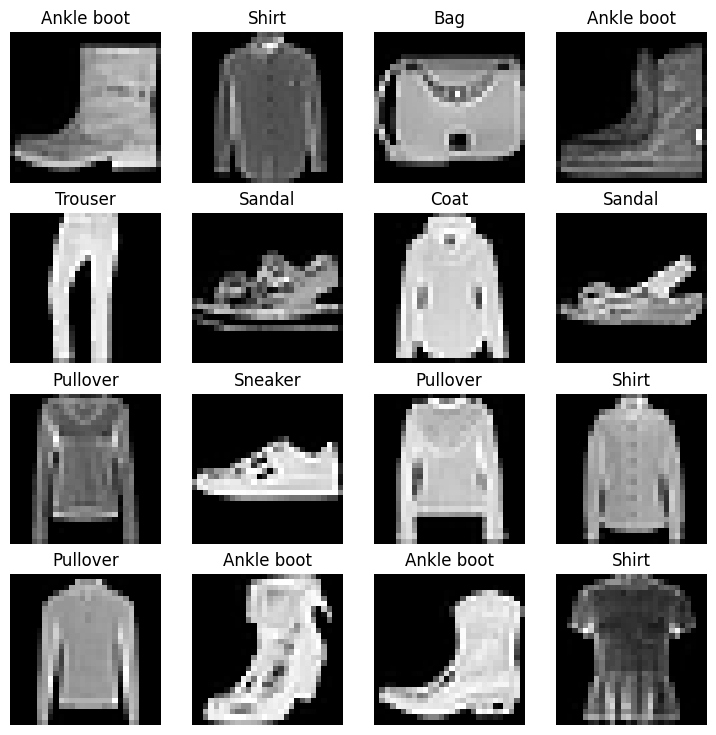

In [2]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

Text(0.5, 1.0, 'Trouser')

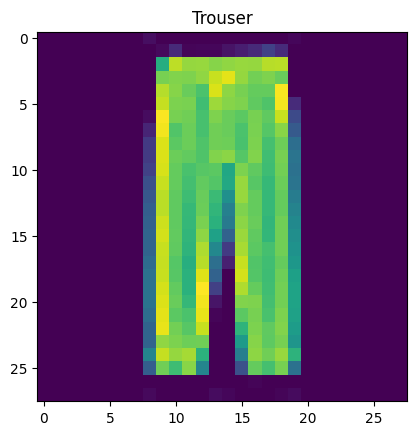

In [3]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader= DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)
test_dataloader= DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_features_batch, train_labels_batch=next(iter(train_dataloader))
len(train_features_batch)
len(train_labels_batch)

rand_idx=torch.randint(0, len(train_features_batch), size=[1]).item()
img, label =train_data[rand_idx]
plt.imshow(img.squeeze())
train_classes= train_data.classes
plt.title(train_data.classes[label])

In [4]:


class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),

    )
  def forward(self,x):
    return self.layer_stack(x)
model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))

loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params=model_0.parameters(), lr=0.1)

import requests
from pathlib import Path
if Path('helper_functions.py').is_file():
  print('Function exists, skipping download')
else:
  print('Downloading functions')
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)
from helper_functions import accuracy_fn

#Check how fast the model run
from timeit import default_timer as timer
def print_train_time(start:float
                      ,end:float,
                     device:torch.device=None):
  total_time=end-start
  print(f'Train time on {device}:{total_time:.3f} seconds')
  return total_time


In [5]:

from tqdm.auto import tqdm


torch.manual_seed(42)
train_time_start_on_cpu = timer()


epochs = 3


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")

    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()


        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)


    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:

            test_pred = model_0(X)


            test_loss += loss_fn(test_pred, y)


            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59360 | Test loss: 0.50814, Test acc: 82.25%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47598 | Test loss: 0.48270, Test acc: 82.99%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45453 | Test loss: 0.47896, Test acc: 83.48%

Train time on cpu:37.157 seconds


In [6]:
#Make predictions and evaluate
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss, acc = 0,0
  model.eval()
  model.to(device)
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device), y.to(device)
      y_pred=model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {'model name': model.__class__.__name__,
          'model loss': loss.item(),
          'model acc': acc}
model_0_result=eval_model(model=model_0,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn
                        )
model_0_result


{'model name': 'FashionMNISTModelV0',
 'model loss': 0.47896066308021545,
 'model acc': 83.47643769968052}

In [7]:
#Non linearity class
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
              out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
              out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)


In [8]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784,
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)
next(model_1.parameters()).device
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [9]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss, train_acc = 0,0
  model.train()
  model.to(device)
  for batch, (X,y) in enumerate(data_loader):
    X,y=X.to(device), y.to(device)
    y_pred=model(X)
    loss= loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  test_loss, test_acc = 0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device), y.to(device)
      test_pred=model(X)

      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))


    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")





In [10]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
epochs=3
for epoch in tqdm(range(epochs)):
  train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn
               )
  test_step(model=model_1,
               data_loader=test_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 1.05878 | Train accuracy: 62.19%
Test loss: 0.99506 | Test accuracy: 64.13%

Train loss: 0.91331 | Train accuracy: 66.40%
Test loss: 0.90508 | Test accuracy: 66.86%

Train loss: 0.87982 | Train accuracy: 67.24%
Test loss: 0.89476 | Test accuracy: 66.46%

Train time on cuda:35.589 seconds


In [11]:
model_1_result=eval_model(model=model_1,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)

model_0_result=eval_model(model=model_0,
                    data_loader=test_dataloader,
                    loss_fn=loss_fn,
                    accuracy_fn=accuracy_fn)
model_1_result, model_0_result

({'model name': 'FashionMNISTModelV1',
  'model loss': 0.8947636485099792,
  'model acc': 66.46365814696486},
 {'model name': 'FashionMNISTModelV0',
  'model loss': 0.47896066308021545,
  'model acc': 83.47643769968052})

In [12]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )


        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [13]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm
train_time_start=timer()
epochs=3
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}---------------------')
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
train_time_end=timer()
total_train_time_model_2=print_train_time(start=train_time_start,end=train_time_end,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0---------------------
Train loss: 0.59383 | Train accuracy: 78.39%
Test loss: 0.39303 | Test accuracy: 85.76%

Epoch:1---------------------
Train loss: 0.36026 | Train accuracy: 87.09%
Test loss: 0.34832 | Test accuracy: 87.28%

Epoch:2---------------------
Train loss: 0.32002 | Train accuracy: 88.48%
Test loss: 0.31257 | Test accuracy: 88.69%

Train time on cuda:46.167 seconds


In [14]:
model_0_result=eval_model(model=model_0,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
model_1_result=eval_model(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
model_2_result=eval_model(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)
import pandas as pd
compare_results=pd.DataFrame([model_0_result,model_1_result,model_2_result])
compare_results


,model name,model loss,model acc
0,FashionMNISTModelV0,0.478961,83.476438
1,FashionMNISTModelV1,0.894764,66.463658
2,FashionMNISTModelV2,0.312565,88.688099


In [15]:
model_2_result=eval_model(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)


Text(0, 0.5, 'model')

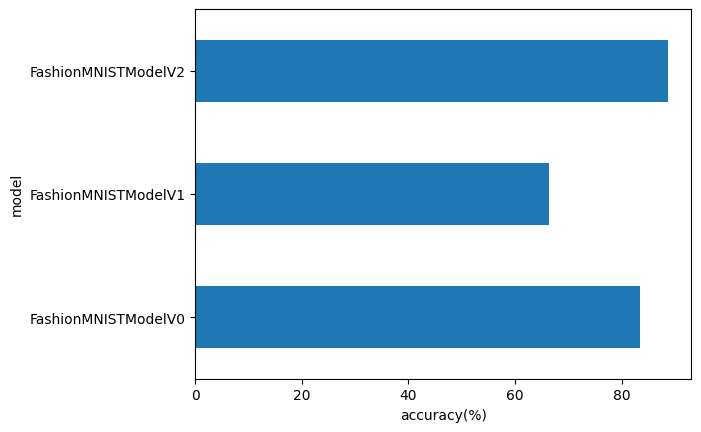

In [16]:
compare_results.set_index('model name')['model acc'].plot(kind='barh')
plt.xlabel('accuracy(%)')
plt.ylabel('model')

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


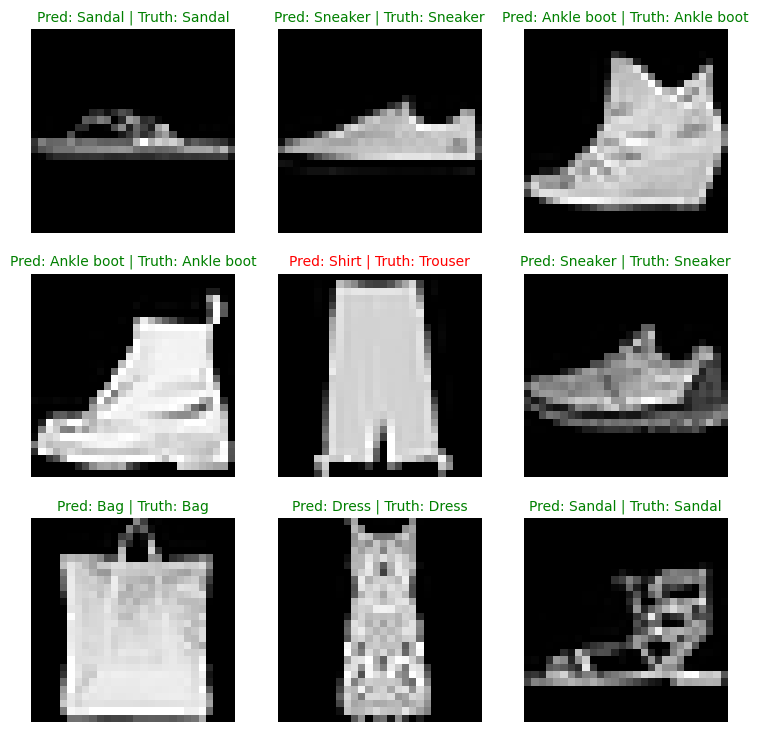

In [17]:
device='cuda' if torch.cuda.is_available() else 'cpu'
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:

            sample = torch.unsqueeze(sample, dim=0).to(device)


            pred_logit = model(sample)


            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)


            pred_probs.append(pred_prob.cpu())


    return torch.stack(pred_probs)
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

pred_classes = pred_probs.argmax(dim=1)
pred_classes
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

mlxtend version: 0.22.0
0.22.0


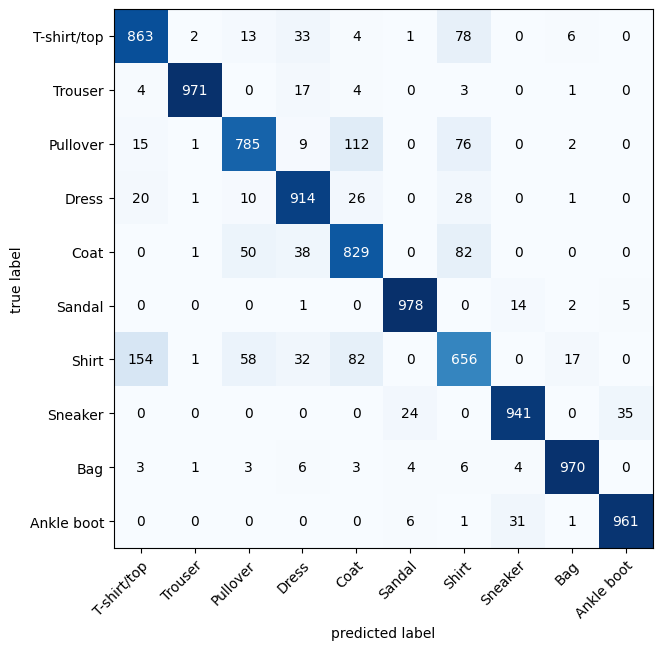

In [21]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7))


In [27]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True) # if models directory already exists, don't error


MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)


loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2 = loaded_model_2.to(device)
torch.manual_seed(42)
model_2_results=eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn)
torch.isclose(torch.tensor(model_2_results["model loss"]),
              torch.tensor(loaded_model_2_results["model loss"]),
              atol=1e-08,
              rtol=0.0001)



Saving model to: models/03_pytorch_computer_vision_model_2.pth


tensor(True)